# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.

**Q1.** Open the "tidy_data.pdf" document in the folder, which is a paper called Tidy Data by Hadley Wickham.

    1. Read the abstract. What is this paper about?

> Wickham is interested in thinking more abstractly about the process of data cleaning, which probably doesn't receive as much attention as it should. Removing `NA`'s is great, but beyond that, what should data look like in order to decide you're done cleaning? He introduces a criteria (each row is an observation, each column is a variable, each type of observational unit is a table) and explore the consequences.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish? 
  
> Despite being a large part of data analysis --- both in terms of the time it requires and the coneceptual effort invested in it --- data cleaning is understudied as a skill or activity. The "tidy data standard" is meant to standardize data cleaning. The goal of the standard is to make it easier to clean data, since everyone involved knows what the objective is and the usual steps required to succeed. 
  
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  
> The idea in the first sentence is that dysfunctional and messy data often present unique or novel problems, while clean data all have similar properties. You have probably experienced this already: Whoever created the data structured it for their purposes or out of convenience, and manipulating it successful within R requires substantial effort. This is a Russian literature joke. The second sentence acknowledges that the idea of a "Data frame/matrix" is intuitive -- a row is an observation, a column is a variable -- but in practice, this is a choice that often benefits the analyst if it is made consciously. For example, if you have data for counties by year, what "are" your data? An observation is a county-year, which might not be obvious to someone who hasn't played with that kind of data before, who might conclude that an observation is a county; this would lead to a lot of unintentionally bad choices about cleaning and organizing the data.
  
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  
  > A dataset is a collection of values. Values are numeric or categorical/strings. Every value belongs to both a variable and an observation. A variable is a collection of values that measure the same attribute or property (e.g. height, color, temperature, make/model).  An observation is a collection of values that measure it.
  
  5. How is "Tidy Data" defined in section 2.3?
  
> In tidy data, each variable is a column, each observation is a row, and each type of observational unit is a table. If data is not tidy, it is messy. 
  
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  
> 1. Column headers are values (like year), and not variable names. So for example, unemployment by county over time is represented as a matrix where columns are years and rows are counties. The column header is really a numeric like 2012, which is a value, not a variable name, like "Year". 2. Multiple variables are stored in one column. For example, month-day-year dates include three things: month, day, and year. Time variables inevitably have to be converted into another kind of format (e.g. normalized to a "0" date, and then time measured in numbers of days since day 0). 3. Variables are stored in both rows and columns. 4. Multiple types of observational units are stored in the same table. For example, entrepreneurs/firms, children/parents, workers/firms all get lumped into one big file rather than separate datasets for the two groups. 5. A single observational unit is stored in multiple tables. Data get repeated in an inconvenient way, required subsequent simplification and cleaning. In Table 4, the columns are really values of a "hidden" variable, which is income. Since income is actually a variable, you need a new column, `income`, alongside `religion`, and then frequency, as in table 6. Now, the columns are all the names of variables, rather than the values that variables take. Melting a dataset is this process of converting column-value variables into rows.
  
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  
  > Table 11 has days along the top, which are values. Table 12 melts those days into a single variable, `date`. That still isn't tidy, because the `element` variable contains variable names and not values --- `tmax` and `tmin` are measurements of the same day, which are really names of variables and not values themselves. Table 12(b) is tidy because all the entries are attributes and not variable names.
  
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

> What Wickham wants is a broader philosophy of data cleaning. If the tidy framework is just about facilitating certain tools, it's just marketing. Wickham is hoping that the tidy concept isn't just about training people to use ggplot2 effectively, but in creating a bigger and more robust ecosystem of ideas and tools for data science in general.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)


In [2]:
df = pd.read_csv('./data/airbnb_hw.csv', low_memory=False)
print( df.shape, '\n')
df.head()

(30478, 13) 



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [3]:
price = df['Price']
price.unique()

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

> It was imported as a string, because there's a comma separator for thousands that we need to eliminate.

In [4]:
price = df['Price']
price = price.str.replace(',','') # Replace commas with nothing
print( price.unique() , '\n')
price = pd.to_numeric(price,errors='coerce') # Typecast price to float/numeric
print( price.unique() , '\n')
print( 'Total missing: ', sum( price.isnull() ) ) # This converts all the values

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' '47

2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.

In [5]:
df = pd.read_csv('./data/sharks.csv', low_memory=False)
# df.head()
# df.columns.tolist()

In [6]:
df['Type'].value_counts()

Type
Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: count, dtype: int64

In [7]:
type = df['Type'] # Create a temporary vector of values for the Type variable to play with

type = type.replace(['Sea Disaster', 'Boat','Boating','Boatomg'],'Watercraft') # All watercraft/boating values
type.value_counts()

type = type.replace(['Invalid', 'Questionable','Unconfirmed','Unverified','Under investigation'],np.nan) # All unclean values
type.value_counts()

df['Type'] = type # Replace the 'Type' variable with the cleaned version
del type # Destroy the temporary vector

df['Type'].value_counts()

Type
Unprovoked    4716
Provoked       593
Watercraft     583
Name: count, dtype: int64

In [8]:
# This is interesting: Sharks are much more likely to kill you if the situation is UNprovoked. 
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].replace(['UNKNOWN', 'F','M','2017'],np.nan) # All unclean values
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].replace('y','Y') # All unclean values
pd.crosstab(df['Type'],df['Fatal (Y/N)'],normalize='index')

Fatal (Y/N),N,Y
Type,,
Provoked,0.967521,0.032479
Unprovoked,0.743871,0.256129
Watercraft,0.684303,0.315697


3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

In [9]:
df = pd.read_csv('./data/VirginiaPretrialData2017.csv', low_memory=False)
# df.head()
# df.columns.tolist()

In [10]:
release = df['WhetherDefendantWasReleasedPretrial']
print(release.unique(),'\n')
print(release.value_counts(),'\n')
release = release.replace(9,np.nan) # In the codebook, the 9's are "unclear"
print(release.value_counts(),'\n')
sum(release.isnull()) # 31 missing values
df['WhetherDefendantWasReleasedPretrial'] = release # Replace data column with cleaned values
del release

[9 0 1] 

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64 

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64 



4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.) 

In [11]:
length = df['ImposedSentenceAllChargeInContactEvent']
type = df['SentenceTypeAllChargesAtConvictionInContactEvent']

# print( length.unique()  , '\n') # Some values are ' ', denoting missing
length = pd.to_numeric(length,errors='coerce') # Coerce to numeric
length_NA = length.isnull() # Create a missing dummy
print( np.sum(length_NA),'\n') # 9k missing values of 23k, not so good

print( pd.crosstab(length_NA, type), '\n') # Category 4 is cases where the charges were dismissed

length = length.mask( type == 4, 0) # Replace length with 0 when type ==4
length = length.mask( type == 9, np.nan) # Replace length with np.nan when type == 9

length_NA = length.isnull() # Create a new missing dummy
print( pd.crosstab(length_NA, type), '\n')
print( np.sum(length_NA),'\n') # 274 missing, much better

df['ImposedSentenceAllChargeInContactEvent'] = length # Replace data with cleaned version
del length, type # Delete temporary length/type variables

9053 

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914     0    0
True                                                 0     0    0  8779  274 

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914  8779    0
True                                                 0     0    0     0  274 

274 



**Q3.** There is a file called `college_completion.csv` in the Assignment #2 zip folder. 

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.

In [12]:
df = pd.read_csv('./data/college_completion.csv',low_memory=False)

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [13]:
import pandas as pd
df = pd.read_csv('./data/college_completion.csv')

In [14]:
print( df.shape, '\n') # 3798 observations, 63 variables
print( df.head(), '\n') # Notice how the '...' column that hides a lot of variables

(3798, 63) 

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ..

3. Cross tabulate `control` and `level`. Describe the patterns you see.

In [15]:
print(pd.crosstab(df['control'],df['level']),'\n')
print(pd.crosstab(df['control'],df['level'], normalize = 'all'),'\n')


level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



> Most institutions (31%) are private non-for-profit, 4-year colleges. The next most common are public two-year institutions with 24% of the population, then public 4-year and private for-profit 2-year/4-year are all around 12-17%. Most institutions are 4-year and most institutions are public, but that hides a lot of heterogeneity across the categories.

4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.

<Axes: xlabel='grad_100_value', ylabel='Count'>

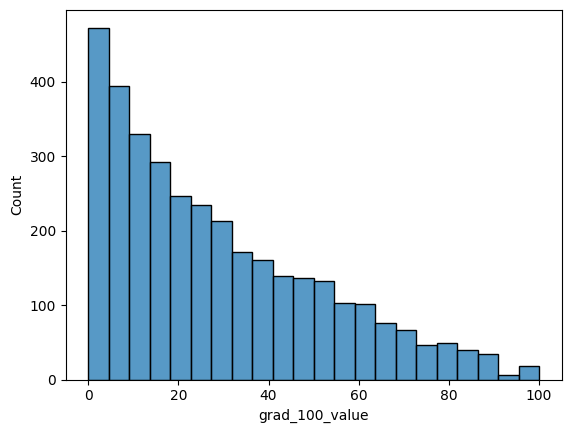

In [16]:
import seaborn as sns
sns.histplot(df['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

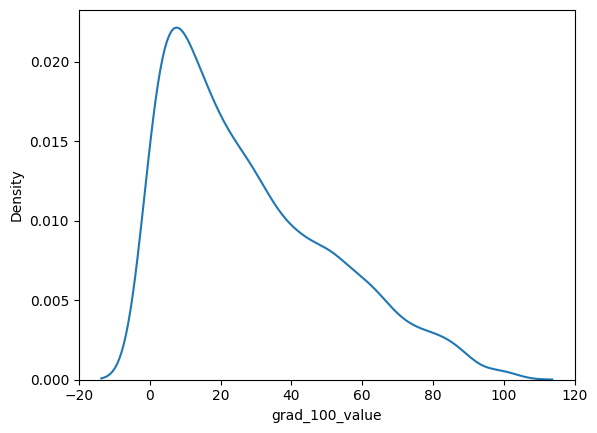

In [17]:
sns.kdeplot(df['grad_100_value'])

<Axes: >

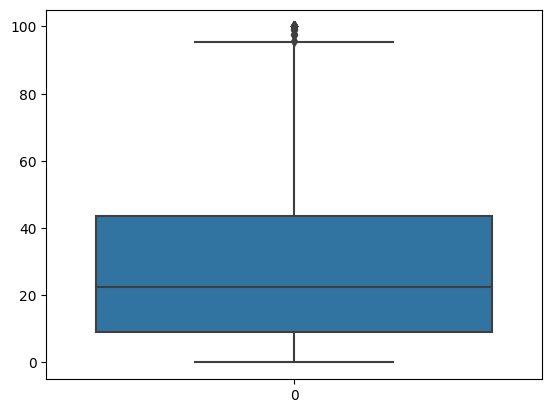

In [18]:
sns.boxplot(df['grad_100_value'])

In [19]:
df['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?

<Axes: xlabel='grad_100_value', ylabel='Density'>

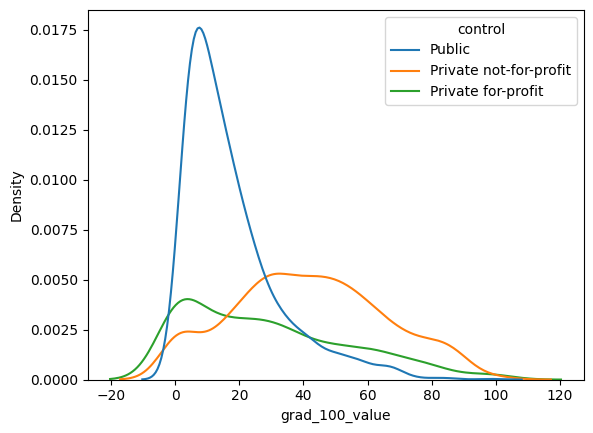

In [20]:
sns.kdeplot(data=df,x='grad_100_value',hue='control')

<Axes: xlabel='grad_100_value', ylabel='Density'>

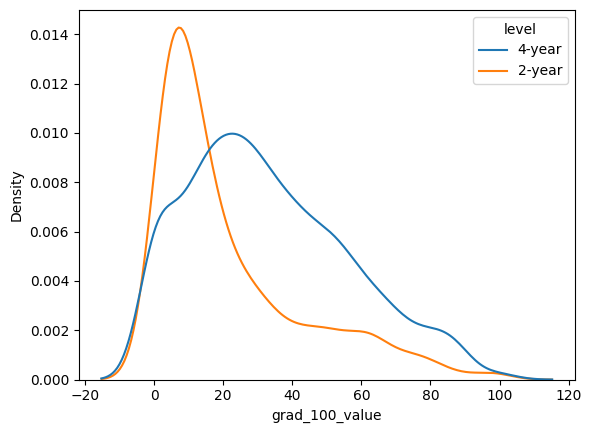

In [21]:
sns.kdeplot(data=df,x='grad_100_value',hue='level')

In [22]:
df.loc[:,['control','grad_100_value']].groupby('control').describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [23]:
df.loc[:,['level','grad_100_value']].groupby('level').describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

> 4-year average graduation rates are about 10 points higher than 2-year, and private not-for-profit rates are around 42%, compared to 29% for private for-profit and 17% for public. The kernel densities are consistent with these stories.

6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']`. that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

<Axes: xlabel='grad_100_value', ylabel='Density'>

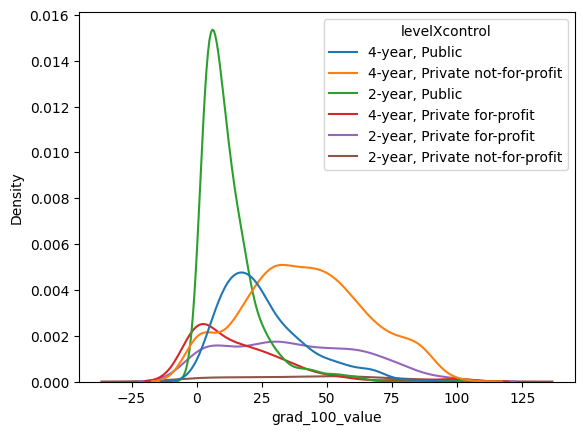

In [24]:
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol')

In [25]:
df.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe()

grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public                   5.100   9.4  16.175   97.8  
4-year Private for-profit       0.000  12.5  26.325  100.0  
       Private not-for-profit  25.000  41.0  57.800  100.0  
       Public                  13.600  21.8  33.800   86.3

> Breaking graduation rates down by both level and control, the private for-profit 2-year rate is almost double the private for-profit 4-year rate, there's little difference across 2-year and 4-year programs from private not-for-profit institutions, and public 2-year rates are the worst by far. So there's a lot of heterogeneity across the groups that tells a pretty nuanced story. For example, 2-year private for-profit programs don't actually seem that bad in terms of performance as measured by graduation rates.

7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.

<Axes: xlabel='aid_arcsinh', ylabel='Density'>

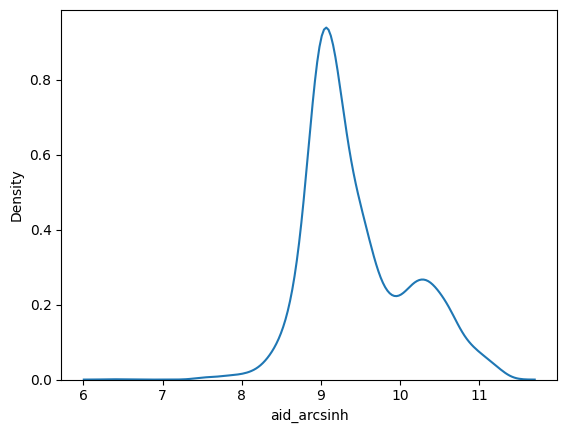

In [26]:
df['aid_arcsinh'] = np.arcsinh(df['aid_value'])
sns.kdeplot(data=df,x='aid_arcsinh') # Here is the illusive second mode

<Axes: xlabel='aid_value', ylabel='Density'>

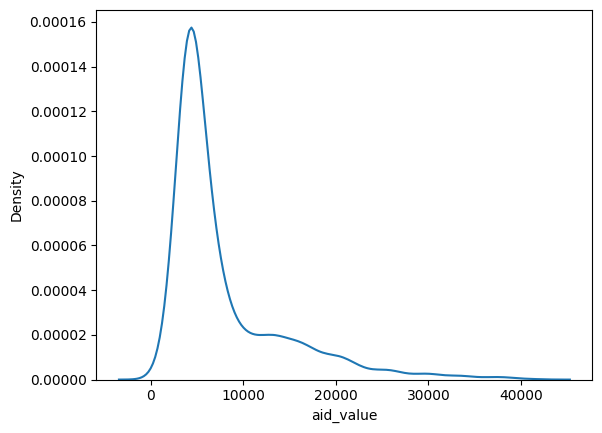

In [27]:
sns.kdeplot(data=df,x='aid_value') # Here it is in levels, with a barely noticeable second mode around $11k

<Axes: xlabel='aid_value', ylabel='Density'>

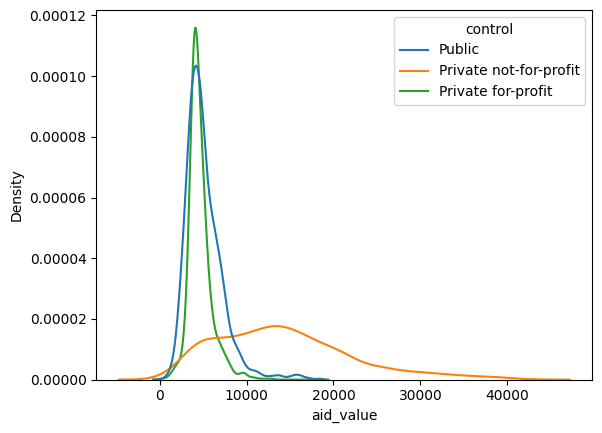

In [28]:
sns.kdeplot(data=df,x='aid_value',hue='control')

<Axes: xlabel='aid_value', ylabel='Density'>

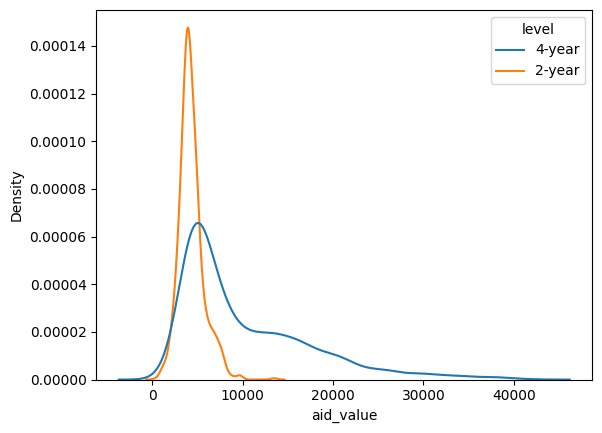

In [29]:
sns.kdeplot(data=df,x='aid_value',hue='level')

In [30]:
df.loc[:,['control','aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [31]:
df.loc[:,['level','aid_value']].groupby('level').describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

> The second mode corresponds to private not-for-profit institutions, and the peak around 9 corresponds to public and private for-profit institutions. Private NFP just gives a lot more aid, and Public and Private FP institutions give similar amounts. This isn't explained by the level variable, since Private NFP includes both kinds of institutions. You can see this in the statistics at the mean and quantiles, and in the kernel density plots.

8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

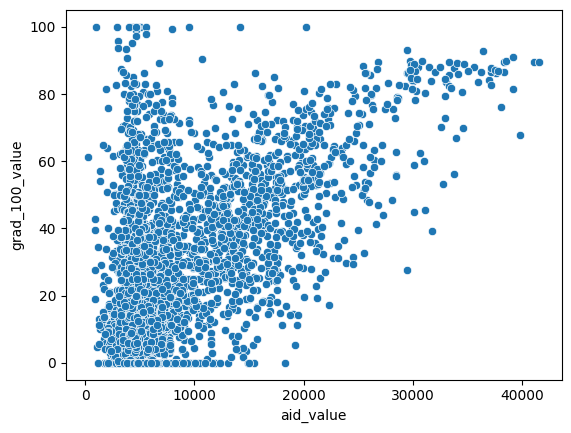

In [32]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value')

> There's a group of points that exhibit a positive association between grad_100_value and aid_value, and a group where grad_100_value seems to grow but aid_value doesn't move very much.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

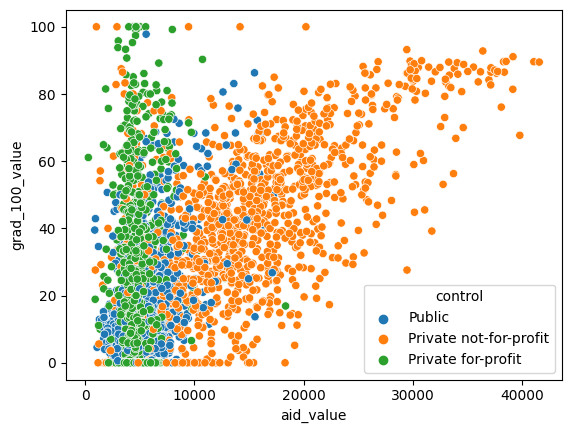

In [33]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='control')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

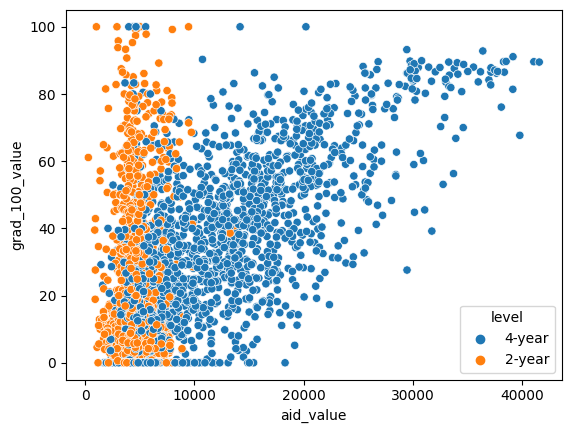

In [34]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='level')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

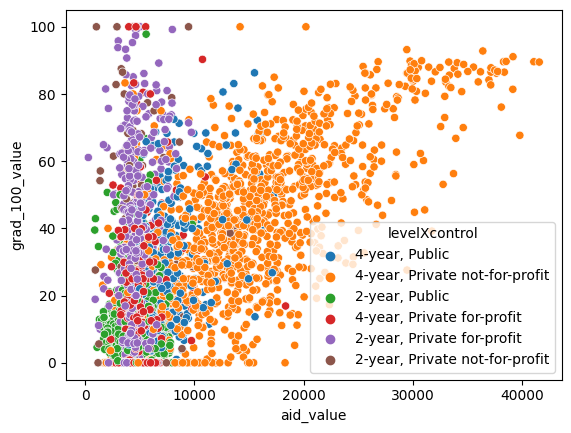

In [35]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='levelXcontrol')

> So the positive association appears to be mainly 4-year, Private NFP institutions, where aid_value and grad_100_value increase together. All the other groups seem to give relatively low amounts of aid, and graduation rates vary wildly. This might be due to recruiting: Private NFP's compete for students by offering aid, pursuing a highly talented pool of students. Or it could be a causal effect: If students get more aid, they are more likely to graduate. We can't say much more than that from these data, but the trends are interesting to consider.

**Q4.** This question uses the Airbnb data to practice making visualizations. Unless specified in the question, you can use Pandas or Seaborn.

  1. Load the `./data/airbnb_NYC.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.

In [36]:
import pandas as pd
df = pd.read_csv('./data/airbnb_hw.csv')

# Clean price variable:
price = df['Price']
price = price.str.replace(',','') # Replace commas with nothing
price = pd.to_numeric(price,errors='coerce') # Typecast price to float/numeric
df['Price'] = price
del price

  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [37]:
print(df.shape)
df.head()

(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


> There are 30,478 observations of 13 variables. The variables are:

In [38]:
df.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [39]:
pd.crosstab(df['Property Type'],df['Room Type'])

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


> First, there are a lot of novelty properties: Lighthouse, Cabin, Boat, Bungalow, etc. Once those are ignored, the vast majority are Apartments, followed by Houses, then Lofts, then Condos. For the Apartments, the majority are the entire property, but for Houses, more rentals are private room rather than the entire property.

  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.

<Axes: xlabel='Price', ylabel='Count'>

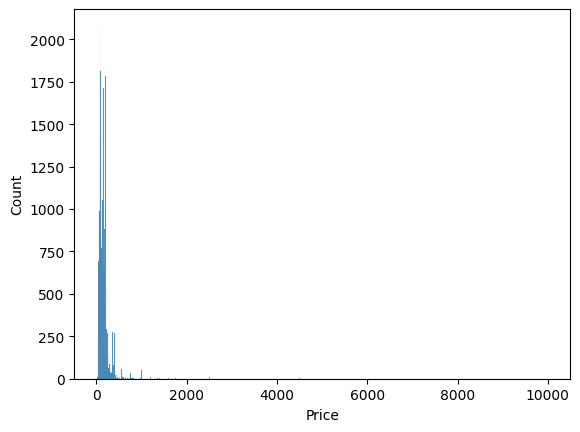

In [40]:
sns.histplot(data=df,x='Price')

<Axes: xlabel='Price', ylabel='Density'>

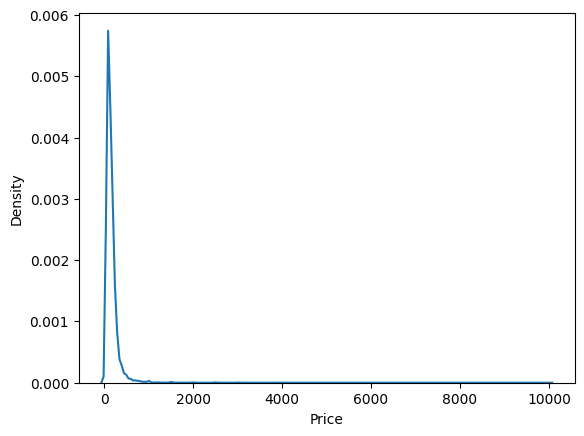

In [41]:
sns.kdeplot(data=df,x='Price')

<Axes: xlabel='Price'>

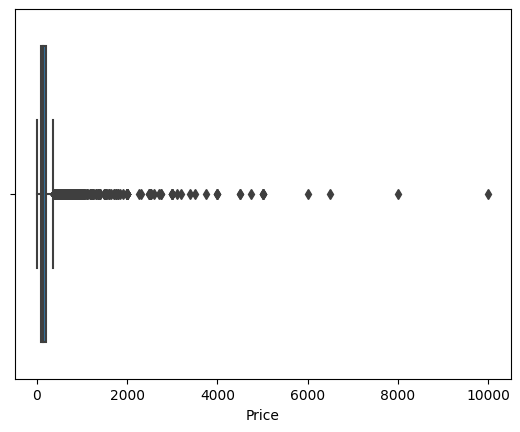

In [42]:
sns.boxplot(data=df,x='Price')

In [43]:
df['Price'].describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

In [44]:
df['Price_log'] = np.log(df['Price'])

<Axes: xlabel='Price_log', ylabel='Count'>

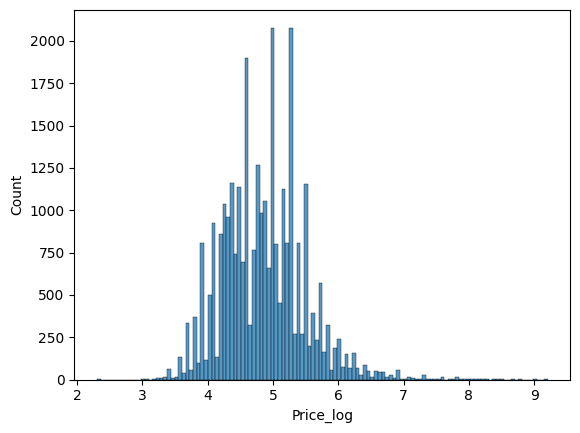

In [45]:
sns.histplot(data=df,x='Price_log')

<Axes: xlabel='Price_log', ylabel='Density'>

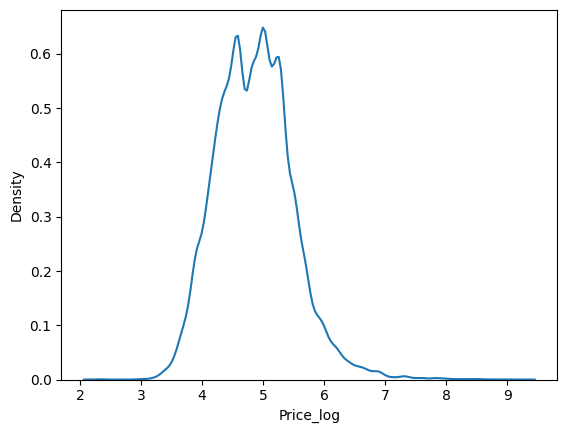

In [46]:
sns.kdeplot(data=df,x='Price_log')

<Axes: xlabel='Price_log'>

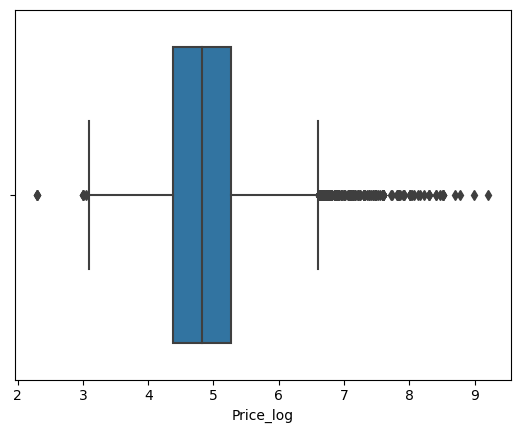

In [47]:
sns.boxplot(data=df,x='Price_log')

In [48]:
df['Price_log'].describe()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_log, dtype: float64

  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

<Axes: xlabel='Beds', ylabel='Price_log'>

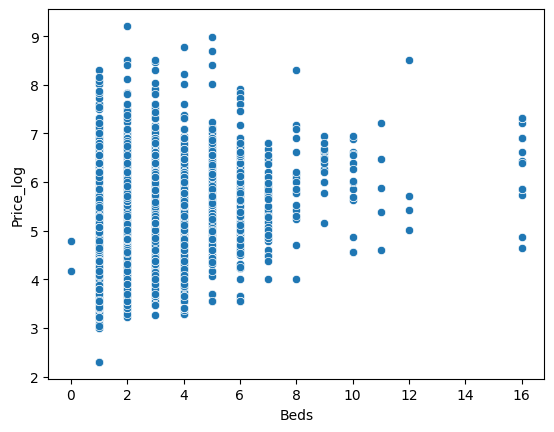

In [49]:
sns.scatterplot( data=df, x='Beds', y='Price_log')

In [50]:
df.loc[:,['Beds','Price']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

> As the number of beds goes up, the price tends to increase, from 92 for zero (zero?) beds, to 128 to 199 to 268 to 215 to 411. Between 6 and and 16, it looks like the pattern is less obvious; this is probably because of outlier properties with huge prices (look at the max values in the last column; we might want to trim or windsorize some outliers to focus on more representative properties). Similarly, the standard deviation goes up until 6, and then it varies a lot by the number of beds.

  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

<Axes: xlabel='Beds', ylabel='Price_log'>

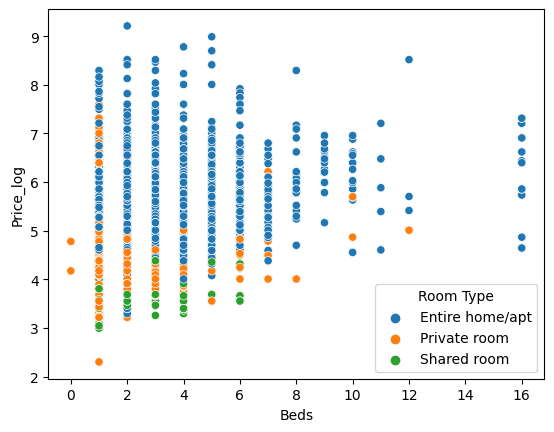

In [51]:
sns.scatterplot(data=df,x='Beds',y='Price_log',hue='Room Type')

In [52]:
var = 'Price'
group = 'Room Type'
df.loc[:,[group,var]].groupby(group).describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

> Looking at the plot, the Shared Room and Private Room points (orange and green) are along the bottom envelope of the data, meaning they're typically the cheapest properties for any given number of beds. In the table, on average

  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

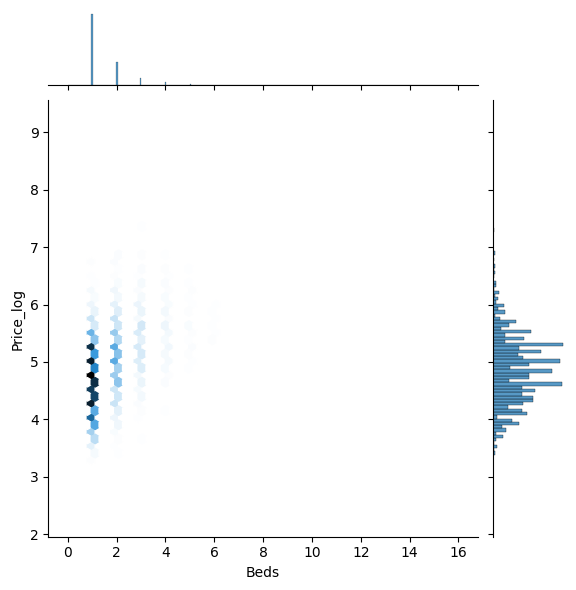

In [53]:
sns.jointplot(data=df,x='Beds',y='Price_log',kind='hex')

> The vast majority of the properties for rent have 1 or 2 beds, and some properties with 3 or 4 beds. There are very few properties in the 5-16 range at all. Likewise, the vast majority of properties are within a price band of 2.5 to 6 log points, or about $40 to $400. So a lot of the outlier or atypical behavior was capturing our attention, but the vast majority of properties are within those bounds. 

**Q5.** 

Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. Likewise, many important datasets contain a sex or gender variable, typically limited to a handful of values often including Male and Female. 

1. How did the most recent US Census gather data on sex, gender, sexuality, and race?

I might be going overboard here, but I looked at the 2020 Census, the 2020 American Community Survey (ACS), and the 2020 Household Pulse Survey (HPS), to compare and contrast how the Census Bureau is approaching these questions. People typically mean the ACS when they talk about Census data

- For the 8-page Census and 20-page 2020 ACS, the questions are very similar:
    -  Sex is binary Male/Female, but doesn't distinguish between assignment at birth versus current identification
    -  Race is collected as a top level "check all that apply", with write-in boxes for more nuance (e.g. White, then English). For ethnicity, Hispanic/Latino/Spanish origin is collected, along with more specific details about origin (e.g. Cuban, Mexican, Puerto Rican)
    -  No SOGI (Sexual Orientation and Gender Identity) questions
 
- For the 44-page 2020 HPS,
    -  Race is similar to ACS/Census (check all that apply) but the questions aren't broken out by broad categories (white, Black, indigenous, etc.)
    -  For sex, "What sex were you assigned at birth, on your original birth certificate?", along with "Do you currently describe yourself as male, female or transgender?" with a "None of these" option. There's an alternative version of the question that includes "Non-binary"
    -  For SOGI, there is a question, "Which of the following best represents how you think of yourself?" including "Gay or lesbian",  "Straight, that is not gay or lesbian", "Bisexual", "Something else", "I don't know"


3. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?

> There are many reasons to do this and the data play many roles. One would be economic: They determine how need is measured, how aid is distributed, and what kinds of policies are proposed and enacted. One would be sociological: Knowing the true proportions of the populations that fall into each demographic group is important for understanding who we are, and can foster tolerance and inclusion. Particular areas of the country might be homogeneous, but being able to describe how diverse the country really is in objective terms can be important in crafting policy and helping people understand how complex the needs and identities of other citizens are. If the data don't capture that information or do so in a 

4. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?

> For race, at least, I think they do a reasonable job of giving people the identify with one or more broad categories, but then also provide additional nuance. Older versions of the census tried to ask questions like, "Which group do you most identify as?" but it's unclear whether that was effective in gathering information, and researchers probably just used that variable and ignored the nuance of the rest of the information gathered.

> For SOGI, the HPS question is probably better overall in 2023. The question about "assigned at birth" might be somewhat intrusive and doesn't give options for the respondent to say "I don't know" or "I prefer not to answer", which is bad practice because it forces the enumerator to enter something. The question then follows up with a more nuanced set of categories that address contemporary discussions about sex and gender. The HPS version isn't perfect, but the ACS/Census version provides no nuance or measurement at all. Likewise, ACS/Census gathers no data on sexuality, but HPS makes an attempt to get information on LGB and S identification.

> I've seen a lot of race questions that only allow one identification and only offer categories of "White, Black, Asian, Other" that really lack nuance, so this "check all that apply" approach with some broad categories as well as supplementary information seems like a major improvement. Likewise, most surveys have limited options for SOGI data or none, so more nuanced data gathering like the HPS (which isn't perfect, but makes a sincere attempt) will be important in the future; for example, some surveys suggest 16-20% of people under 25 identify as LGBT, even if that number has historically been between 5% to 7%.

5. When it comes to cleaning and analyzing data, what concerns do you have about potentially sensitive variables like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?

> I think the biggest problem is probably that we force people into making a "pie chart" of who they are without making the meaning of the exercise very explicit. Let's take race, for example. "What is your race?" might mean something like, "Roughly, what percentage of your great grandparents were members of the following groups: White, Black, Asian, Indigenous?" For example, I am 7/8 Irish and 1/8 German. That is one way to make sense of the question, but seems tied to a historical idea of Americans as immigrants with a specific mix of origination countries. Today, that isn't really how a lot of people think about themselves or their culture, and those great grandparents will themselves have complex, multi-dimensional identities. A person can fully be a member of multiple racial communities, and the appropriate way to let them express that kind of identity is to ask, "Of the following groups, which do you consider yourself a member?", close to what the Census is doing. Similarly, when it comes to SOGI questions, it's likewise better to let people pick affiliation or not with a variety of categories, rather than construct a question that forces them into a one-dimensional answer.

> To be a little more formal about this, imagine it's a choice between category A and category B. We could model it as a dummy variable, `D`, with `D=0` meaning group A and `D=1` meaning group B. That means you have to pick A or B, but not both and not neither. Likewise, a "check at most one" question with many categories will lead to a categorical variable where you have `A` or `B` or nothing. A "check all that apply" question means you have a vector of categories and any combination of ones and zeros is possible, like with race on the Census; this would allow answers of `AB`, `A`, `B`, and nothing. You might want to go even further in some cases, and gather a numeric value that expresses the intensity of association with each category, like $(A=.75, B=.8)$, allowing values to sum to greater than 1, but I doubt any surveys actually do this because it would be hard to elicit these numbers in a consistent and meaningful way.

> When there are missing values in race/sex/gender categories, people will be tempted to impute values. However, the people who don't answer these questions probably have a reason for doing so, and using the available to impute values is not responsible because these people are already systematically different from those who answered. For example, if someone has complex ideas about their identity and they opt out of answering, turning around and "filling in the blanks" for them based on other demographic data is worse than wrong, because it undermines their agency in deciding not to answer. These kinds of complications have to be considered when you're dealing with self-reported data from people. 

> My concern when people clean identity-type data is that they'll compress things down to the "main" answers and remove all nuance from the discussion (e.g. aggregate all of the identities from Asian [Chinese, Indian, Japanese, Korean, Vietnamese, and so on] into a single bucket). So the survey goes to a lot of work to gather lots of nuanced data, but then all the nuance might end up erased when it's cleaned to have simple categories for modeling.